In [46]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#loading data (UCI Machine Learning - Online Retail)

path="data/Online_Retail.xlsx"
df=pd.read_excel(path, engine="openpyxl", parse_dates=["InvoiceDate"])
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [48]:
#delete nan values for customerID
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Amount              0
dtype: int64

In [49]:
df=df[df['CustomerID'].isna()==False]

In [50]:
df.isna().sum()
print(df.shape)

(406829, 9)


In [51]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [53]:
# TotalSum Column
df["Amount"] = df["Quantity"] * df["UnitPrice"]
df.head()

<ipython-input-53-4c473115aa80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Amount"] = df["Quantity"] * df["UnitPrice"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#Creating table RFM (Reference, Frecuency, Value)

In [66]:
customers=df.groupby('CustomerID')["Amount"].sum()
customers=customers.reset_index()
customers.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [65]:
customers_freq=df.groupby('CustomerID')['InvoiceNo'].count()
customers_freq=customers_freq.reset_index()
customers_freq.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [68]:
customers_details=pd.merge(customers_freq,customers, on='CustomerID')
customers_details.head()

,CustomerID,InvoiceNo,Amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [72]:
max_date=max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [73]:
df['recency']=max_date-df['InvoiceDate']
df.head()

<ipython-input-73-7112d855bd9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recency']=max_date-df['InvoiceDate']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [78]:
dates=df.groupby('CustomerID')['recency'].min()
dates=dates.reset_index()

In [79]:
import datetime as dt
dates['recency']=dates['recency'].dt.days
dates.head()

,CustomerID,recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [80]:
customers_details=pd.merge(customers_details,dates, on='CustomerID')
customers_details.head()

,CustomerID,InvoiceNo,Amount,recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309


In [81]:
#remove outliers
z=customers_details.Amount.quantile(0.05)
y=customers_details.Amount.quantile(0.95)
iqr=y-z

In [84]:
customers_details=customers_details[(customers_details['Amount']>=z-1.5*iqr) &
                                  (customers_details['Amount']<=y+1.5*iqr)]
customers_details

,CustomerID,InvoiceNo,Amount,recency
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
...,...,...,...,...
4367,18280.0,10,180.60,277
4368,18281.0,7,80.82,180
4369,18282.0,13,176.60,7
4370,18283.0,756,2094.88,3


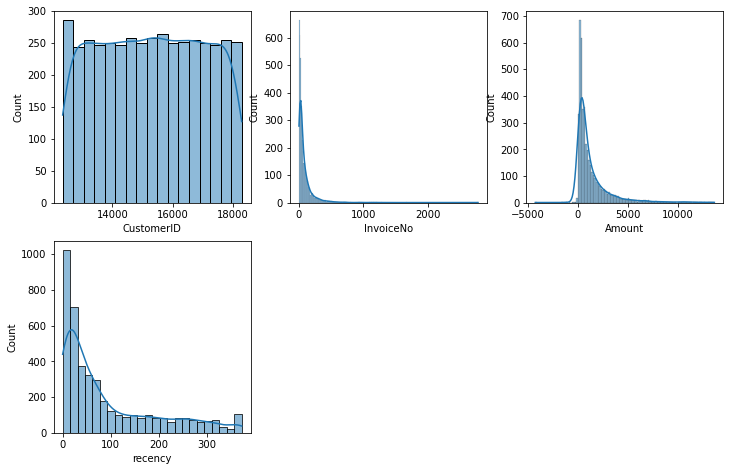

In [85]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
for i, column in enumerate(customers_details.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(customers_details[column],kde=True)    

In [86]:
#scale with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(customers_details[['InvoiceNo','Amount','recency']])
scaled_values=pd.DataFrame(scaled)
scaled_values.columns=['InvoiceNo','Amount','recency']
scaled_values

,InvoiceNo,Amount,recency
0,-0.637326,-0.721944,2.307057
1,0.791337,1.682279,-0.903167
2,-0.407152,0.280601,-0.179876
3,-0.073798,0.258461,-0.734729
4,-0.518271,-0.535407,2.148527
...,...,...,...
4308,-0.573830,-0.621201,1.831468
4309,-0.597641,-0.676860,0.870383
4310,-0.550019,-0.623432,-0.843718
4311,5.347182,0.446632,-0.883351


In [47]:
#Creating table RFM (Reference, Frecuency, Value)

# TotalSum Column
df["Amount"] = df["Quantity"] * df["UnitPrice"]

# Lastday column
import datetime
snapshot_date = max(df.InvoiceDate) + datetime.timedelta(days=1)

# Add values for column
customers = df.groupby(['CustomerID']).agg({
'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
'InvoiceNo': 'count',
'TotalSum': 'sum'})

# Rename the columns
customers.rename(columns = {'InvoiceDate': 'days_pass',
'InvoiceNo': 'Frecuency',
'TotalSum': 'Value'}, inplace=True)

SpecificationError: nested renamer is not supported

In [4]:
customers

,days_pass,Frecuency,Value
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


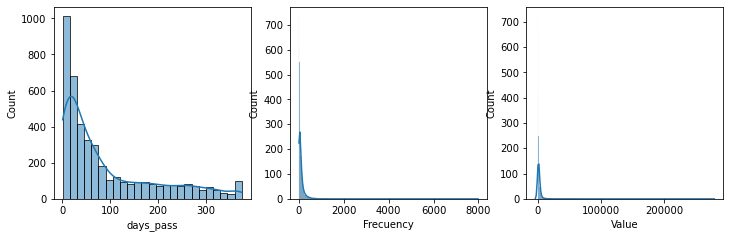

In [5]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
for i, column in enumerate(customers.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(customers[column],kde=True)    

In [6]:
#We need transform the data because we have skew. 
#We transform and compare different transformations (box-cox, log, sqrt) in order to choose de best one for days_pass and Frecuency.
#In the case of "Value" we have negative values so we use Yeo-Johnson ad cbrt to transform.

In [7]:
# Box-Cox Transform
from sklearn.preprocessing import PowerTransformer
# extract features with skew
features=customers[["days_pass","Frecuency"]]

#instatiate 
pt=PowerTransformer(method="box-cox",standardize=True)
#Fit the data to the powertransformer
skl_boxcox=pt.fit(features)

#Transform the data 
skl_boxcox=pt.transform(features)

#Pass the transformed data into a new dataframe 
df_features=pd.DataFrame(data=skl_boxcox,columns=["days_pass_BC","Frecuency_BC"])
#df_features

In [8]:
#Repeat with log and sqrt
df_features["days_pass_log"]=pd.Series(np.log(customers["days_pass"])).values
df_features["days_pass_sqrt"]=pd.Series(np.sqrt(customers["days_pass"])).values

df_features["Frecuency_log"]=pd.Series(np.log(customers["Frecuency"])).values
df_features["Frecuency_sqrt"]=pd.Series(np.sqrt(customers["Frecuency"])).values


column_to_move = df_features.pop("Frecuency_BC")
df_features.insert(3, "Frecuency_BC", column_to_move)

In [9]:
df_features.describe()

,days_pass_BC,days_pass_log,days_pass_sqrt,Frecuency_BC,Frecuency_log,Frecuency_sqrt
count,4.372000e+03,4372.000000,4372.000000,4.372000e+03,4372.000000,4372.000000
mean,3.327146e-16,3.732268,8.145637,7.487403e-17,3.684042,7.822424
std,1.000114e+00,1.464709,5.069673,1.000114e+00,1.341198,5.645375
min,-2.072003e+00,0.000000,1.000000,-2.527249e+00,0.000000,1.000000
25%,-7.130583e-01,2.833213,4.123106,-6.604983e-01,2.833213,4.123106
50%,3.650514e-03,3.912023,7.071068,1.930865e-03,3.737670,6.480741
75%,8.409482e-01,4.962845,11.958261,6.859230e-01,4.624973,10.099505
max,1.750433e+00,5.924256,19.339080,4.600201e+00,8.985070,89.347636


In [10]:
#skew without transformation
print(customers.skew())
#skew with transformation
print(df_features.skew())

#we consider simetric when skew is close to zero, in days_pass and Frecuency the best fit if or box_cox transformation.

days_pass     1.249665
Frecuency    18.153735
Value        21.705287
dtype: float64
days_pass_BC     -0.073259
days_pass_log    -0.534991
days_pass_sqrt    0.592223
Frecuency_BC      0.004669
Frecuency_log    -0.244993
Frecuency_sqrt    3.203886
dtype: float64


In [11]:
#Repeat the proccess for Value with cbrt and Yeo Johnson
df_features["Value_cbrt"]=pd.Series(np.cbrt(customers["Value"])).values

# Yeo Johnson transform 
from scipy import stats
df_features["Value_Yeo"]=stats.yeojohnson(customers["Value"])[0]

In [12]:
df_features[["Value_cbrt", "Value_Yeo"]].skew() #in this case cbrt have better results

Value_cbrt    2.290649
Value_Yeo     5.100041
dtype: float64

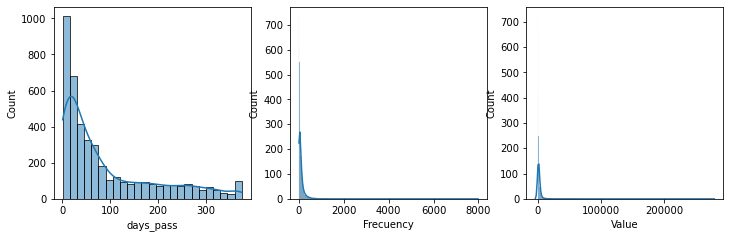

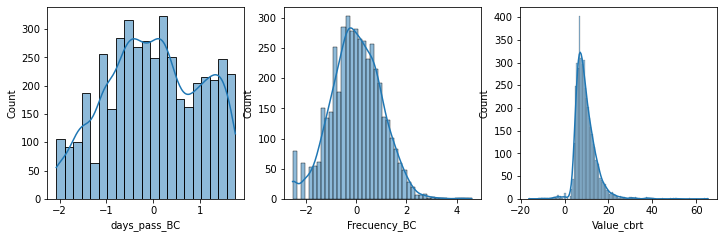

In [13]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
for i, column in enumerate(customers.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(customers[column],kde=True) 
#with boxcox
fig2, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,12))    
for i, column in enumerate(df_features[["days_pass_BC","Frecuency_BC","Value_cbrt"]],1):
    plt.subplot(3,3,i)
    sns.histplot(df_features[column],kde=True)

In [14]:
#Transform columns

from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Days_pass"] = df_features["days_pass_BC"].values
customers_fix["Frequency"] = df_features["Frecuency_BC"].values
customers_fix["MonetaryValue"] = df_features["Value_cbrt"].values

customers_fix.shape

(4372, 3)

In [15]:
#Normalizing data in order to have a similiar mean and std

from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]
pd.DataFrame(customers_normalized).describe()
customers_norm=pd.DataFrame(customers_normalized)
customers_norm.index=customers.index
customers_norm.rename(columns = {0: "Days_pass",
1: "Frequency",
2:"MonetaryValue"}, inplace=True)

[ 0. -0. -0.]
[1. 1. 1.]


In [16]:
customers_norm

,Days_pass,Frequency,MonetaryValue
CustomerID,,,
12346.0,1.611173,-2.098072,-1.925647
12347.0,-1.797592,1.151346,1.330542
12348.0,0.309053,-0.224316,0.507038
12349.0,-0.645121,0.423978,0.488997
12350.0,1.560964,-0.660498,-0.536848
...,...,...,...
18280.0,1.453730,-1.033496,-0.794663
18281.0,1.050255,-1.277936,-1.060566
18282.0,-1.140972,-0.850484,-0.803075


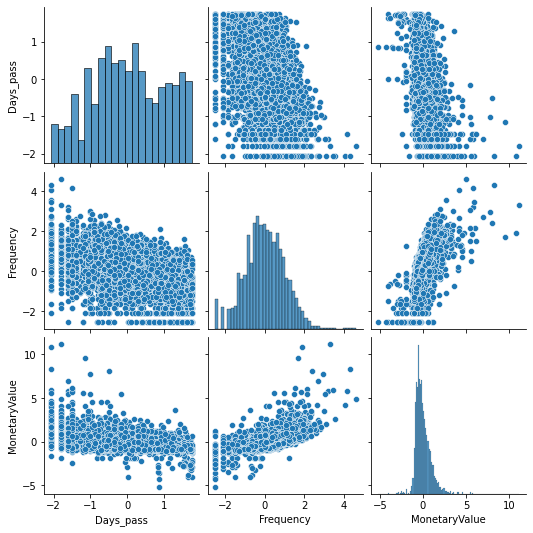

In [17]:
g = sns.pairplot(customers_norm, diag_kind="hist",palette="Set2" )

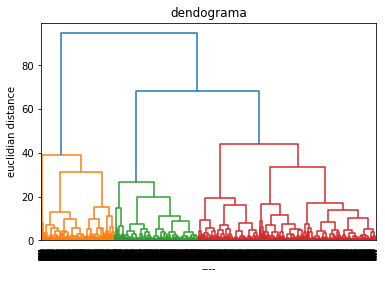

In [18]:
import scipy.cluster.hierarchy as sch

dendrogram=sch.dendrogram(sch.linkage(customers_norm, method="ward"))

plt.title("dendograma")
plt.xlabel("----")
plt.ylabel("euclidian distance")
plt.show()

#maybe two or three clusters fits

For n_clusters = 2 The average silhouette_score is : 0.39416314900089816
For n_clusters = 3 The average silhouette_score is : 0.3202256905686115
For n_clusters = 4 The average silhouette_score is : 0.2999795670569894
For n_clusters = 5 The average silhouette_score is : 0.29238358248633844
For n_clusters = 6 The average silhouette_score is : 0.2958558066063724


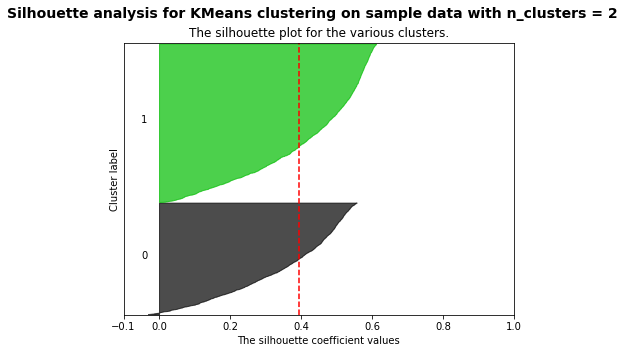

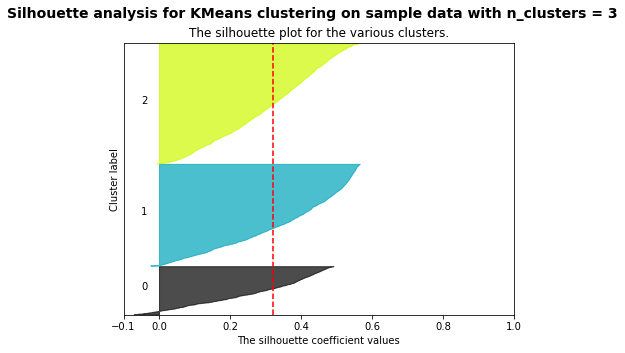

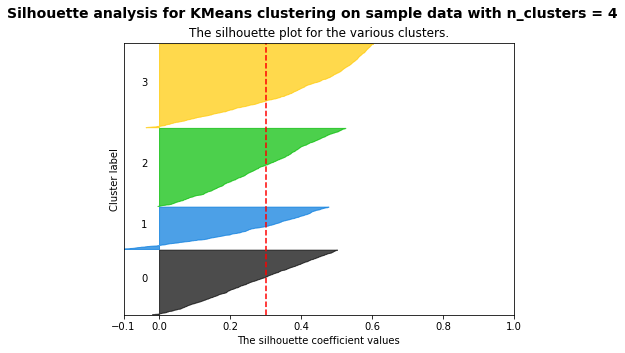

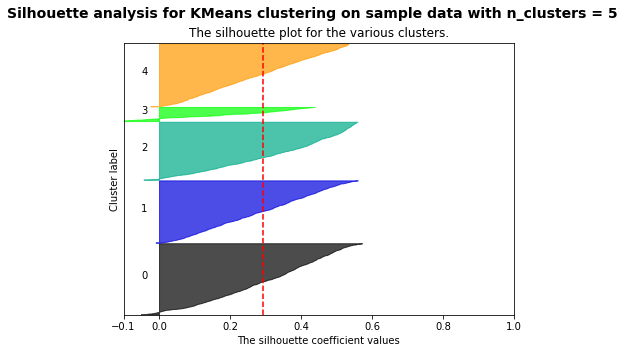

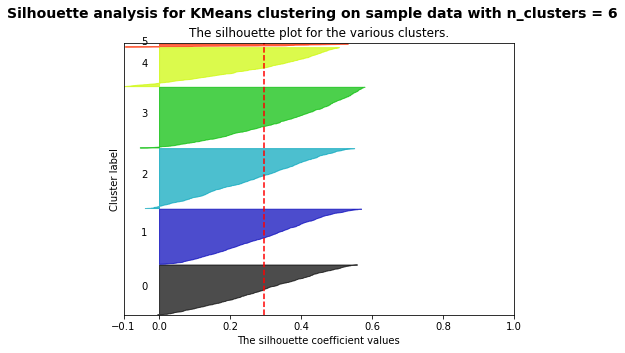

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(customers_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #clusterer = algorithm
    cluster_labels = clusterer.fit_predict(customers_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(customers_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(customers_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [20]:
from sklearn.metrics import pairwise_distances

def cost(data, k, centroids, clusters):
    cost = 0.0
    for c in range(k):
        points_cluster = data[clusters==c, :]
        if points_cluster.shape[0] > 0: 
            distances = pairwise_distances(points_cluster, [centroids[c]], metric='euclidean')
            cost += np.sum(distances**2)
    return cost/len(clusters)

0,1,2,3,4,5,6,7,8,9,

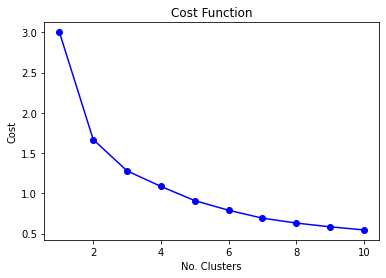

In [21]:
from sklearn.cluster import KMeans

# Arrat que guardará los costes
costsD = np.zeros(10,)
# Valores de k de 1 a 10
ks = 1+np.arange(10)
# Guarda los costes
#costs = np.zeros(20,)
# Valores de k de 5 a 125
#ks = np.linspace(1,20,20).astype(int)

# Ejecuta k-means para cada valor de k, y guarda el coste asociado
for i,k in enumerate(ks):
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=5)   
    kmeans.fit(customers_norm.values)
    centroidsD = kmeans.cluster_centers_
    clustersD = kmeans.labels_
    costsD[i] = cost(customers_norm.values,k,centroidsD,clustersD)
    print(i,end=',')

plt.xlabel('No. Clusters')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.plot(ks,costsD, 'bo-'); 

For n_clusters = 2 The average silhouette_score is : 0.34818216334537916
For n_clusters = 3 The average silhouette_score is : 0.2660752848032953
For n_clusters = 4 The average silhouette_score is : 0.2201899809827034
For n_clusters = 5 The average silhouette_score is : 0.2312412943178962
For n_clusters = 6 The average silhouette_score is : 0.23483244428113098


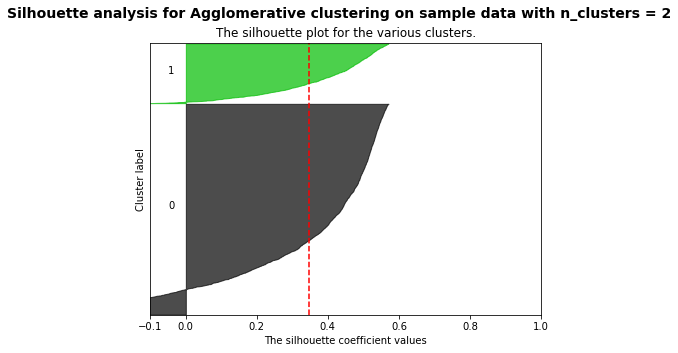

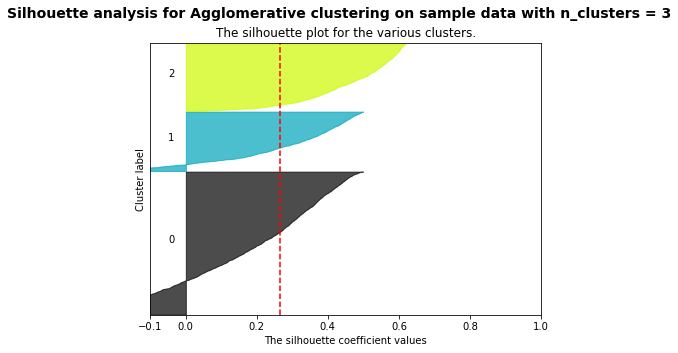

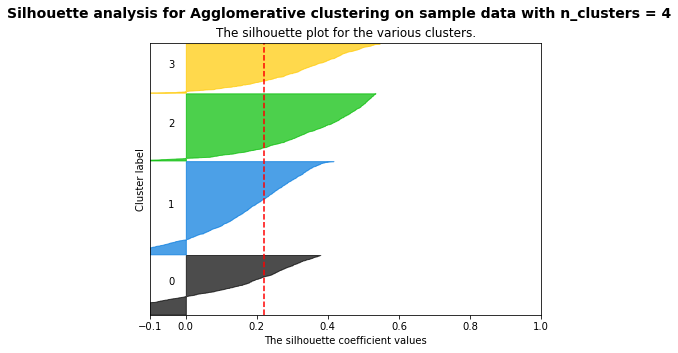

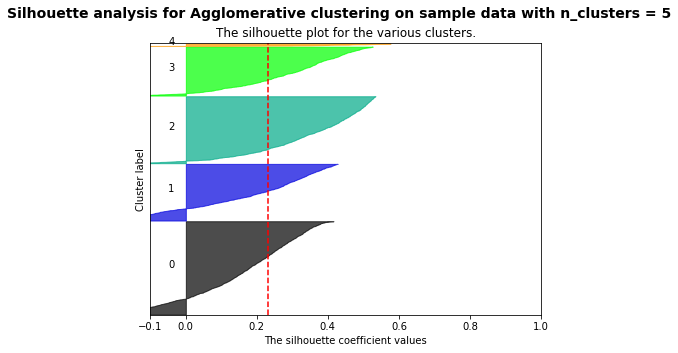

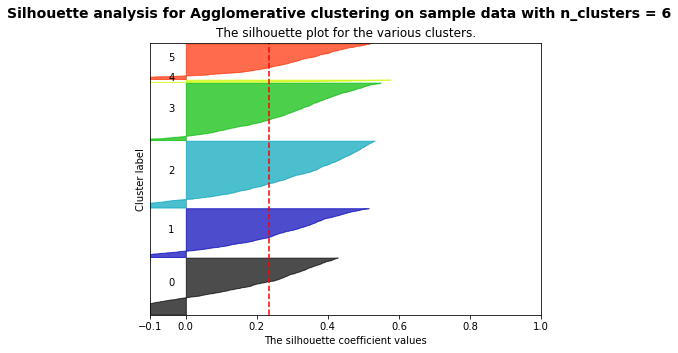

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(customers_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters) ### OJO
    #clusterer = algorithm
    cluster_labels = clusterer.fit_predict(customers_norm) # OJO

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(customers_norm, cluster_labels) #OJO
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(customers_norm, cluster_labels) #OJO

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    
    plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9486635303553589
For n_clusters = 3 The average silhouette_score is : 0.5915782228149455
For n_clusters = 4 The average silhouette_score is : 0.5922325408899575
For n_clusters = 5 The average silhouette_score is : 0.5893673877887385
For n_clusters = 6 The average silhouette_score is : 0.5771985382129309


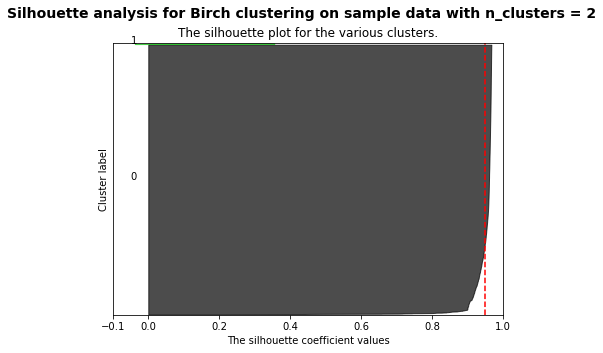

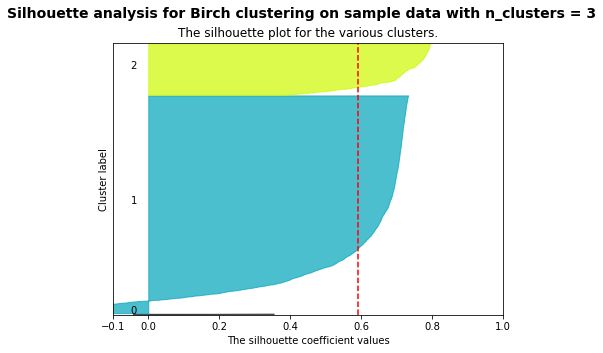

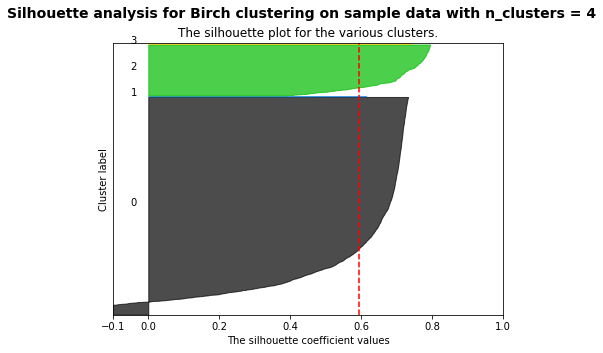

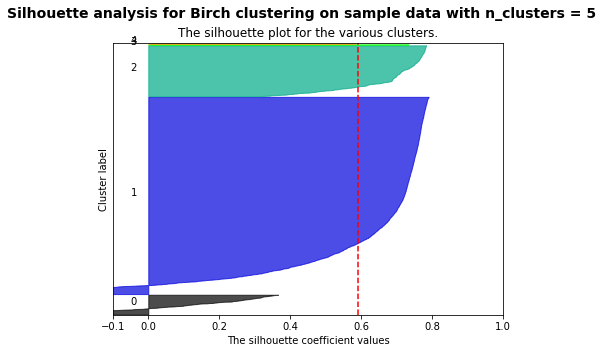

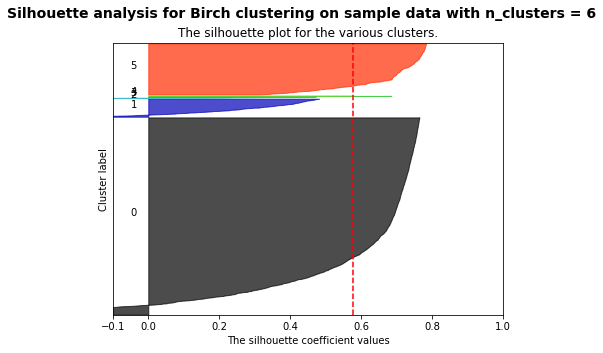

In [121]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import Birch
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(customers_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = Birch(threshold=0.01,n_clusters=n_clusters) ### OJO
    #clusterer = algorithm
    cluster_labels = clusterer.fit_predict(customers_norm) # OJO

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(customers_norm, cluster_labels) #OJO
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(customers_norm, cluster_labels) #OJO

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    
    plt.suptitle(("Silhouette analysis for Birch clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3031977428885646
For n_clusters = 3 The average silhouette_score is : 0.59310176645819
For n_clusters = 4 The average silhouette_score is : 0.4882728377679107
For n_clusters = 5 The average silhouette_score is : 0.46218316117792446
For n_clusters = 6 The average silhouette_score is : 0.4381857337454517


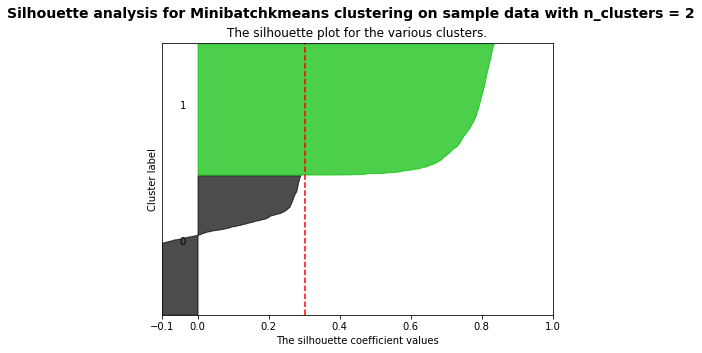

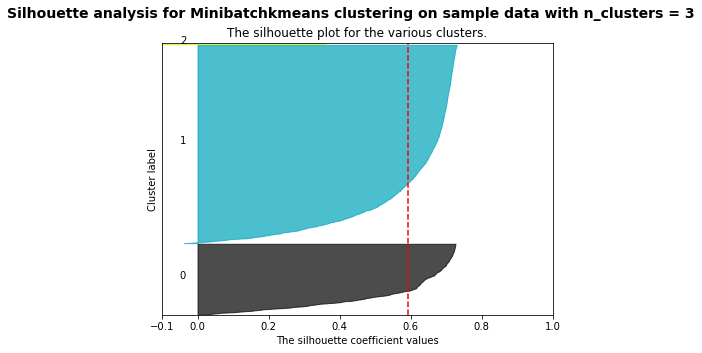

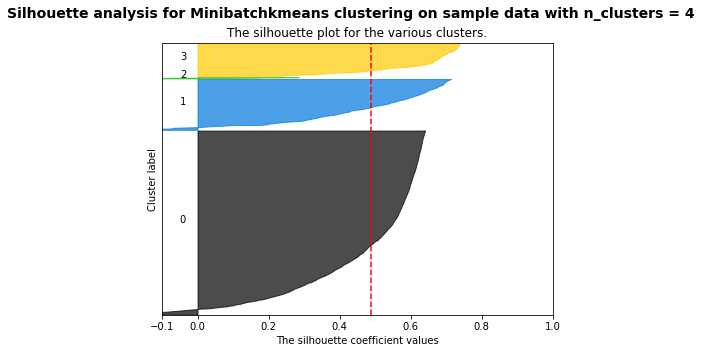

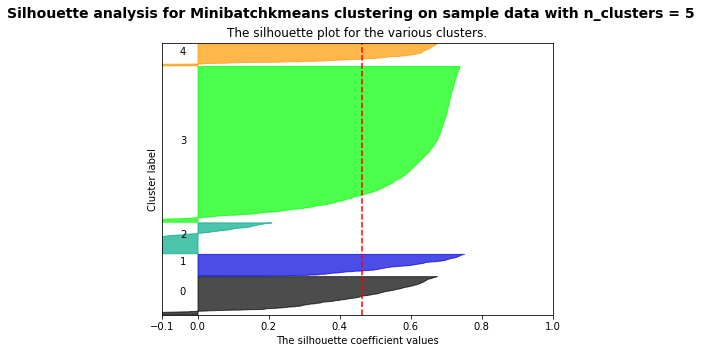

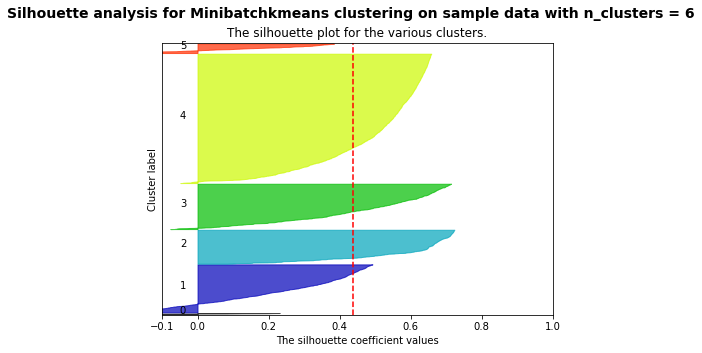

In [122]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import MiniBatchKMeans
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(customers_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = MiniBatchKMeans(n_clusters=n_clusters) ### OJO
    #clusterer = algorithm
    cluster_labels = clusterer.fit_predict(customers_norm) # OJO

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(customers_norm, cluster_labels) #OJO
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(customers_norm, cluster_labels) #OJO

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    
    plt.suptitle(("Silhouette analysis for Minibatchkmeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
#From the above elbow graphs, dendogram and silhouette scores we can take ‘3’ as our k value for number of clusters.

In [125]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

agglomerative= AgglomerativeClustering(n_clusters=2)

df_agglomerative=customers_norm.copy()
yhat=agglomerative.fit_predict(df_agglomerative)

df_agglomerative["label"]=yhat

print(df_agglomerative.groupby("label").size())

label
0    4365
1       7
dtype: int64


In [92]:
#KMEANS MODEL
from sklearn.cluster import KMeans

model=KMeans(n_clusters=2, max_iter=500, random_state=5)

df_kmeans=customers_norm.copy()
yhat=model.fit_predict(df_kmeans)

df_kmeans["label"]=yhat

print(df_kmeans.groupby("label").size())

label
0    1808
1    2564
dtype: int64


In [100]:
#GaussianMixture MODEL
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2)
df_gaussian=customers_norm.copy()

yhat=model.fit_predict(df_gaussian)

df_gaussian["label"]=yhat

print(df_gaussian.groupby("label").size())

label
0    2564
1    1808
dtype: int64


In [103]:
#MiniBatchKMeans MODEL
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=3)
df_mini=customers_norm.copy()

yhat=model.fit_predict(df_mini)

df_mini["label"]=yhat

print(df_mini.groupby("label").size())

label
0    1307
1    1293
2    1772
dtype: int64


In [93]:
customers_norm["agglomerative_label"]=df_agglomerative["label"]
customers_norm["kmeans_label"]=df_kmeans["label"]
customers_norm

,Days_pass,Frequency,MonetaryValue,agglomerative_label,kmeans_label
CustomerID,,,,,
12346.0,1.611173,-2.098072,-1.925647,0,1
12347.0,-1.797592,1.151346,1.330542,1,0
12348.0,0.309053,-0.224316,0.507038,0,1
12349.0,-0.645121,0.423978,0.488997,1,0
12350.0,1.560964,-0.660498,-0.536848,0,1
...,...,...,...,...,...
18280.0,1.453730,-1.033496,-0.794663,0,1
18281.0,1.050255,-1.277936,-1.060566,0,1
18282.0,-1.140972,-0.850484,-0.803075,0,1


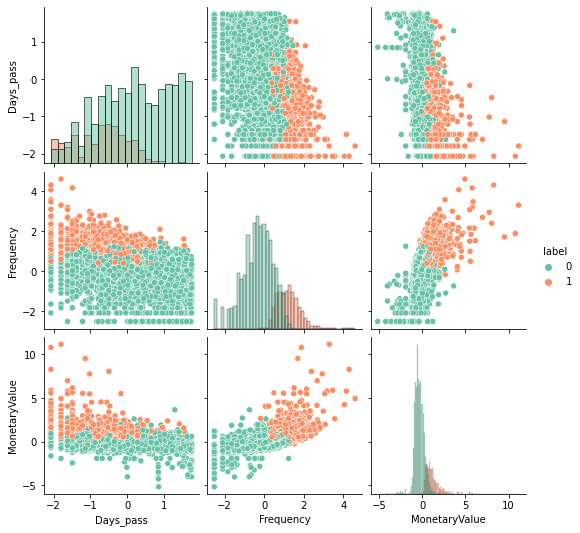

In [94]:
g = sns.pairplot(df_agglomerative, hue="label", diag_kind="hist", palette="Set2") 

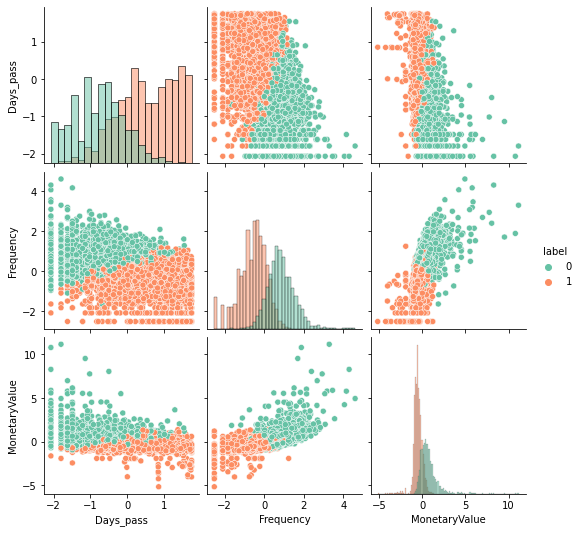

In [95]:
g = sns.pairplot(df_kmeans, hue="label", diag_kind="hist", palette="Set2") 

<Figure size 432x288 with 0 Axes>

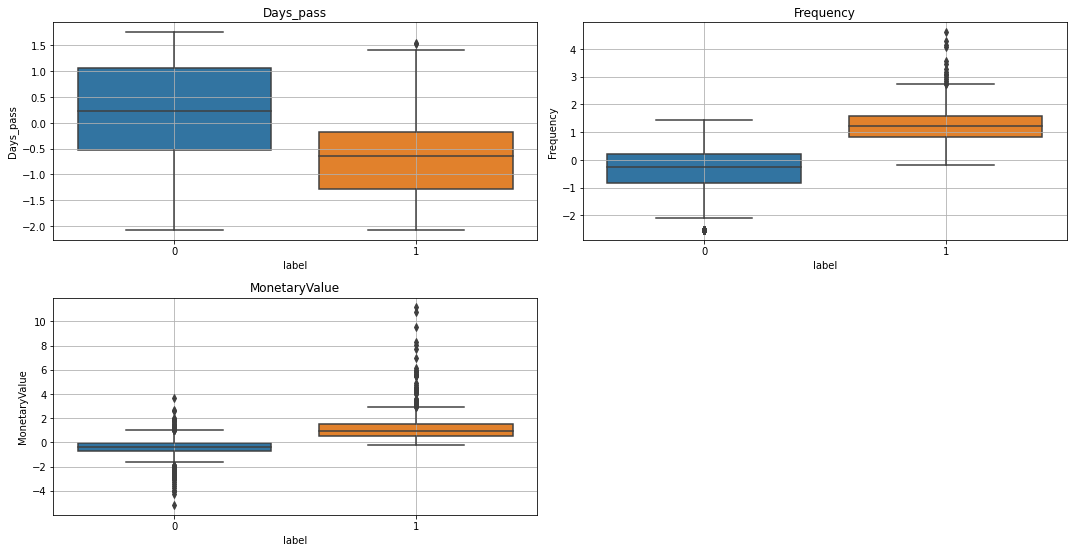

In [96]:
plt.figure(1)
plt.subplots(figsize=(15,15))
plt.subplot(421)
sns.boxplot(x='label',y='Days_pass',data=df_agglomerative)
plt.title('Days_pass')
plt.grid(True)
plt.subplot(422)
sns.boxplot(x='label',y='Frequency',data=df_agglomerative)
plt.title('Frequency')
plt.grid(True)
plt.subplot(423)
sns.boxplot(x='label',y='MonetaryValue',data=df_agglomerative)
plt.title('MonetaryValue')
plt.grid(True)

plt.tight_layout(rect=(0,0,1,1))
plt.show()

<Figure size 432x288 with 0 Axes>

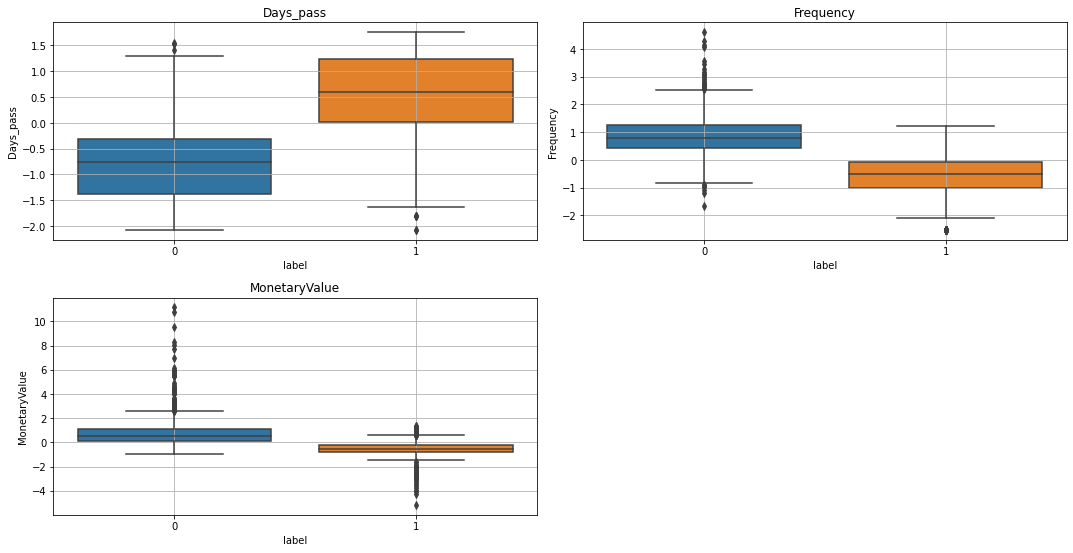

In [97]:
plt.figure(1)
plt.subplots(figsize=(15,15))
plt.subplot(421)
sns.boxplot(x='label',y='Days_pass',data=df_kmeans)
plt.title('Days_pass')
plt.grid(True)
plt.subplot(422)
sns.boxplot(x='label',y='Frequency',data=df_kmeans)
plt.title('Frequency')
plt.grid(True)
plt.subplot(423)
sns.boxplot(x='label',y='MonetaryValue',data=df_kmeans)
plt.title('MonetaryValue')
plt.grid(True)

plt.tight_layout(rect=(0,0,1,1))
plt.show()

In [ ]:
#TO BE CONTINUE...